In [1]:
# Load netCDF4 data
import netCDF4 as nc
import numpy as np

# Load the data

# 1959 is 2m_temperature
# 1979 is total_precipitation_6hr
# 1982 is low_res ERA5 t30 (3.75x3.75)
# Open the file
with nc.Dataset('1959.nc', 'r') as data:
    print(data.variables.keys())
    temperature = data.variables['2m_temperature'][:]
    hr_lats = data.variables['latitude'][:]
    hr_lons = data.variables['longitude'][:]


FileNotFoundError: [Errno 2] No such file or directory: '1959.nc'

In [175]:
lr_lats = [87.159, 83.479, 79.777, 76.070, 72.362, 68.652, 64.942, 61.232, 
                   57.521, 53.810, 50.099, 46.389, 42.678, 38.967, 35.256, 31.545, 
                   27.833, 24.122, 20.411, 16.700, 12.989, 9.278, 5.567, 1.856, 
                   -1.856, -5.567, -9.278, -12.989, -16.700, -20.411, -24.122, 
                   -27.833, -31.545, -35.256, -38.967, -42.678, -46.389, -50.099, 
                   -53.810, -57.521, -61.232, -64.942, -68.652, -72.362, -76.070, 
                   -79.777, -83.479, -87.159]
lr_lons = [0.0, 3.75, 7.5, 11.25, 15.0, 18.75, 22.5, 26.25, 30.0, 33.75,
          37.5, 41.25, 45.0, 48.75, 52.5, 56.25, 60.0, 63.75, 67.5, 71.25,
          75.0, 78.75, 82.5, 86.25, 90.0, 93.75, 97.5, 101.25, 105.0, 108.75,
          112.5, 116.25, 120.0, 123.75, 127.5, 131.25, 135.0, 138.75, 142.5, 146.25,
          150.0, 153.75, 157.5, 161.25, 165.0, 168.75, 172.5, 176.25, 180.0, 183.75,
          187.5, 191.25, 195.0, 198.75, 202.5, 206.25, 210.0, 213.75, 217.5, 221.25,
          225.0, 228.75, 232.5, 236.25, 240.0, 243.75, 247.5, 251.25, 255.0, 258.75,
          262.5, 266.25, 270.0, 273.75, 277.5, 281.25, 285.0, 288.75, 292.5, 296.25,
          300.0, 303.75, 307.5, 311.25, 315.0, 318.75, 322.5, 326.25, 330.0, 333.75,
          337.5, 341.25, 345.0, 348.75, 352.5, 356.25]



In [ ]:
Temperature_7
Specific-Humidity_7
U-wind_3
V-wind_3
logp
tp6hr

In [4]:
file_path = "/media/volume/moein-storage-1/lucie/ERA5_t30/1982_3670.h5"
with h5py.File(file_path, 'r') as f:
    print(f['input']['time'])

<HDF5 dataset "time": shape (), type "|O">


In [2]:
import h5py

# Open the .h5 file
file_path = "/media/volume/moein-storage-1/lucie/ERA5_t30/1982_3670.h5"
with h5py.File(file_path, 'r') as f:
    # List all the keys (groups and datasets) in the file
    for key in f.keys():
        print(f"Key: {key}")
        
        # Check if the key is a group or a dataset
        item = f[key]
        if isinstance(item, h5py.Group):
            print(f"'{key}' is a group.")
            # If it's a group, list its contents
            for sub_key in item.keys():
                # print(f"Sub-key in group '{key}': {sub_key}")
                print(sub_key)
                sub_item = item[sub_key]
                # If sub-item is a dataset, access its shape
                if isinstance(sub_item, h5py.Dataset):
                    print(f"Dataset '{sub_key}' shape: {sub_item.shape}")
        elif isinstance(item, h5py.Dataset):
            # If it's a dataset, directly access its shape
            print(f"'{key}' is a dataset with shape: {item.shape}")

Key: input
'input' is a group.
Specific_Humidity_0
Dataset 'Specific_Humidity_0' shape: (48, 96)
Specific_Humidity_1
Dataset 'Specific_Humidity_1' shape: (48, 96)
Specific_Humidity_2
Dataset 'Specific_Humidity_2' shape: (48, 96)
Specific_Humidity_3
Dataset 'Specific_Humidity_3' shape: (48, 96)
Specific_Humidity_4
Dataset 'Specific_Humidity_4' shape: (48, 96)
Specific_Humidity_5
Dataset 'Specific_Humidity_5' shape: (48, 96)
Specific_Humidity_6
Dataset 'Specific_Humidity_6' shape: (48, 96)
Specific_Humidity_7
Dataset 'Specific_Humidity_7' shape: (48, 96)
Temperature_0
Dataset 'Temperature_0' shape: (48, 96)
Temperature_1
Dataset 'Temperature_1' shape: (48, 96)
Temperature_2
Dataset 'Temperature_2' shape: (48, 96)
Temperature_3
Dataset 'Temperature_3' shape: (48, 96)
Temperature_4
Dataset 'Temperature_4' shape: (48, 96)
Temperature_5
Dataset 'Temperature_5' shape: (48, 96)
Temperature_6
Dataset 'Temperature_6' shape: (48, 96)
Temperature_7
Dataset 'Temperature_7' shape: (48, 96)
U-wind_0


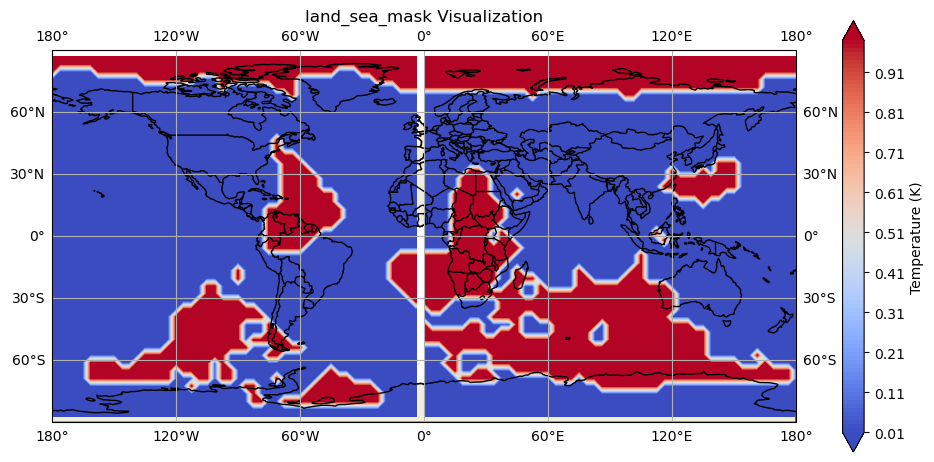

In [160]:

# Open the .h5 file
file_path = '1982_3670.h5'
with h5py.File(file_path, 'r') as f:
    var_name = 'land_sea_mask'
    # Load the temperature data
    temp_data = f['input'][var_name][:]
    
    # Load latitude and longitude data
    # lats = f['input']['Latitude'][:]
    # lons = f['input']['Longitude'][:]


# Create a figure with a cartopy map projection
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# Add coastlines and other map features
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND, zorder=0, edgecolor='black')

# Handle possible discontinuity at the 180° longitude line by setting up boundaries
ax.set_global()

# Create a contour plot of the temperature data
temp_plot = ax.contourf(lr_lons, lr_lats, temp_data, 100, transform=ccrs.PlateCarree(), cmap='coolwarm', extend='both')


# Add a colorbar
cbar = plt.colorbar(temp_plot, ax=ax, orientation='vertical', shrink=0.7)
cbar.set_label('Temperature (K)')

# Add title
ax.set_title(f'{var_name} Visualization')

# Show the plot
plt.show()

In [ ]:
Temperature_7
Specific-Humidity_7
U-wind_3
V-wind_3
logp
tp6hr

(48, 96)


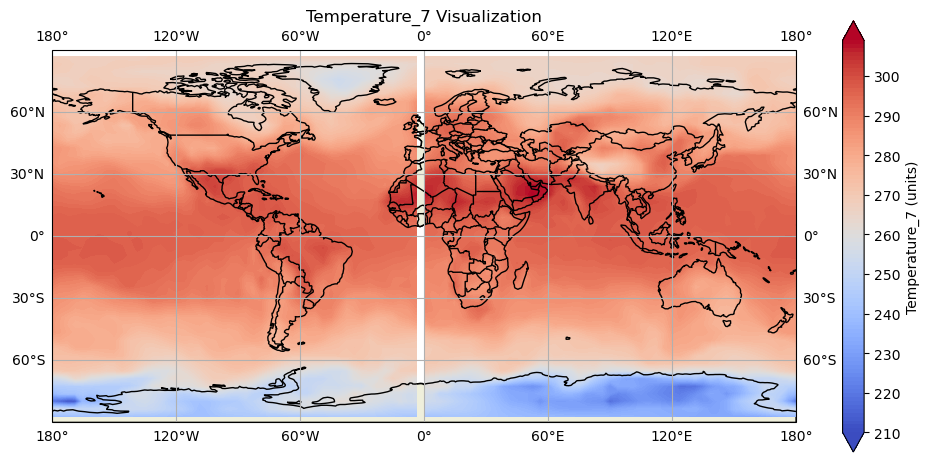

In [179]:
import h5py
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

# Open the .h5 file
file_path = '1982_3670.h5'
with h5py.File(file_path, 'r') as f:
    var_name = 'Temperature_7'  # Assuming this is the variable name you want to plot
    # Load the temperature or land-sea mask data
    temp_data = f['input'][var_name][:]
    print(temp_data.shape)


# Ensure the data is flipped correctly based on latitude order
if lr_lats[0] > lr_lats[-1]:  # If latitudes are reversed (from -90 to 90 instead of 90 to -90)
    temp_data = np.flipud(temp_data)  # Flip the data vertically

# Create a figure with a cartopy map projection
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# Add coastlines and other map features
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND, zorder=0, edgecolor='black')

# Handle possible discontinuity at the 180° longitude line by setting up boundaries
ax.set_global()

# Create a contour plot of the temperature or mask data
temp_plot = ax.contourf(lr_lons, lr_lats, temp_data, 100, transform=ccrs.PlateCarree(), cmap='coolwarm', extend='both')

# Add a colorbar
cbar = plt.colorbar(temp_plot, ax=ax, orientation='vertical', shrink=0.7)
cbar.set_label(f'{var_name} (units)')

# Add title
ax.set_title(f'{var_name} Visualization')

# Show the plot
plt.show()

In [5]:
# Open the file
with nc.Dataset('/media/volume/moein-storage-1/lucie/ERA5_highres/2m_temperature/1984.nc', 'r') as data:
    # print(data.shape)
    print(data.variables.keys())
    temperature = data.variables['2m_temperature'][:]
    hr_lats = data.variables['latitude'][:]
    hr_lons = data.variables['longitude'][:]
    temperature_time = data.variables['time'][:]
    print(len(temperature_time))


with nc.Dataset('/media/volume/moein-storage-1/lucie/ERA5_highres/total_precipitation_6hr/1982_3670.nc', 'r') as data:
    # print(data.shape)
    print(data.variables.keys())
    tp6 = data.variables['total_precipitation_6hr'][:]
    hr_lats = data.variables['latitude'][:]
    hr_lons = data.variables['longitude'][:]
    tp6_time = data.variables['time'][:]
    print(len(tp6_time))


dict_keys(['2m_temperature', 'latitude', 'longitude', 'time'])
1464
dict_keys(['total_precipitation_6hr', 'latitude', 'longitude', 'time'])
1460


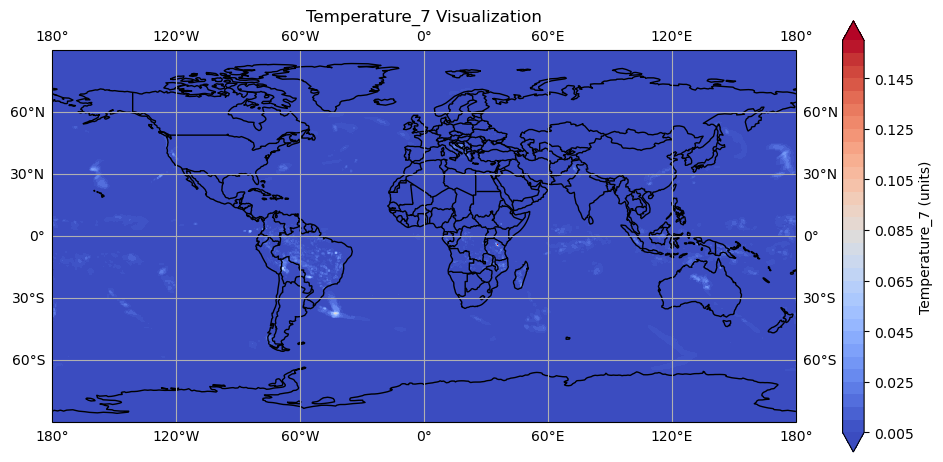

In [181]:
import h5py
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np



# Ensure the data is flipped correctly based on latitude order
# if lats[0] > lats[-1]:  # If latitudes are reversed (from -90 to 90 instead of 90 to -90)
#     temp_data = np.flipud(temp_data)  # Flip the data vertically

# Create a figure with a cartopy map projection
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# Add coastlines and other map features
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND, zorder=0, edgecolor='black')

# Handle possible discontinuity at the 180° longitude line by setting up boundaries
ax.set_global()

# Create a contour plot of the temperature or mask data
temp_plot = ax.contourf(hr_lons, hr_lats, temperature[-1], 40, transform=ccrs.PlateCarree(), cmap='coolwarm', extend='both')

# Add a colorbar
cbar = plt.colorbar(temp_plot, ax=ax, orientation='vertical', shrink=0.7)
cbar.set_label(f'{var_name} (units)')

# Add title
ax.set_title(f'{var_name} Visualization')

# Show the plot
plt.show()

In [68]:
import numpy as np
import torch
from torch.utils.data import Dataset
import h5py
import netCDF4 as nc
import os

class ClimateDataset(Dataset):
    def __init__(self, input_dir, output_dir, timesteps, input_vars, output_vars, lr_lats, lr_lons):
        """
        Args:
            input_dir (str): Path to the directory containing input HDF5 files.
            output_dir (str): Path to the directory containing output NetCDF files.
            timesteps (list): List of timesteps to load.
            input_vars (list): List of variable names to load from the input files.
            output_vars (list): List of variable names to load from the output files.
            lr_lats (list): List of low-resolution latitudes.
            lr_lons (list): List of low-resolution longitudes.
        """
        self.input_dir = input_dir
        self.output_dir = output_dir
        self.timesteps = timesteps
        self.input_vars = input_vars
        self.output_vars = output_vars
        self.lr_lats = lr_lats
        self.lr_lons = lr_lons

    def __len__(self):
        return len(self.timesteps)

    def __getitem__(self, idx):
        # Construct file paths for the input and output based on the timestep
        timestep = self.timesteps[idx]
        
        # Construct input file path (HDF5)
        input_file = os.path.join(self.input_dir, f'{timestep}.h5')
        
        # Construct output_files dictionary based on the current timestep
        output_files = {}
        for var_name in self.output_vars:
            # Assuming each variable is stored in a different folder with the same file naming convention
            # You can modify this path if the folder structure differs for each variable
            output_files[var_name] = os.path.join(self.output_dir, var_name, f'{timestep}.nc')
        
        # Read input data (from HDF5 file)
        input_data = self.load_input_data(input_file)
        
        # Read output data (from NetCDF files) using the reconstructed output_files dictionary
        output_data, hr_lats, hr_lons = self.load_output_data(output_files)
        
        # Prepare the data to be returned as a dictionary
        data = {
            'input': input_data,  # Input data tensor
            'output': output_data,  # Output data tensor
            'input_time': timestep,  # Current timestep
            'output_time': timestep,  # (Same as input, can be different if needed)
            'input_vars': self.input_vars,  # List of input variable names
            'output_vars': self.output_vars,
            'lr_lats': self.lr_lats,  # Low-resolution latitudes
            'lr_lons': self.lr_lons,  # Low-resolution longitudes
            'hr_lats': hr_lats,  # High-resolution latitudes (loaded with output)
            'hr_lons': hr_lons,  # High-resolution longitudes (loaded with output)
        }
        
        return data

    def load_input_data(self, file_path):
        """
        Load the input data from the HDF5 file for the required variables.
        """
        input_data = []
        with h5py.File(file_path, 'r') as f:
            for var_name in self.input_vars:
                data = f['input'][var_name][:]
                input_data.append(data)  # Append each variable's data to the list
        return torch.tensor(input_data)  # Return the data as a PyTorch tensor

    def load_output_data(self, output_files):
        """
        Load the output data from the NetCDF files for the required variables.

        Args:
            output_files (dict): A dictionary mapping variable names to file paths.
        """
        output_data = []
        hr_lats, hr_lons = None, None

        # Iterate over the output variables and their corresponding file paths
        for var_name, file_path in output_files.items():
            with nc.Dataset(file_path, 'r') as f:
                # Load the data for the variable
                data = f.variables[var_name][:]
                output_data.append(data)  # Append the variable data to the list
                
                # Assume hr_lats and hr_lons are the same across all files and load them once
                if hr_lats is None and hr_lons is None:
                    hr_lats = f.variables['latitude'][:]
                    hr_lons = f.variables['longitude'][:]
        
        # Stack the output data (e.g., stacking along a new dimension for each variable)
        output_tensor = torch.tensor(np.stack(output_data, axis=0))

        return output_tensor, hr_lats, hr_lons

# Example usage:
input_dir = '/media/volume/moein-storage-1/lucie/ERA5_t30/'
output_dir = '/media/volume/moein-storage-1/lucie/ERA5_highres/all_data/'
# timesteps = ['1982_3670']  # Example timesteps or filenames
timesteps = 2000
input_vars = ['Temperature_7', 'Specific_Humidity_7', 'U-wind_3', 'V-wind_3', 'logp', 'tp6hr']
output_vars = ['2m_temperature', 'total_precipitation_6hr']
# output_vars = ['2m_temperature', ]


lr_lats = [87.159, 83.479, 79.777, 76.070, 72.362, 68.652, 64.942, 61.232, 
           57.521, 53.810, 50.099, 46.389, 42.678, 38.967, 35.256, 31.545, 
           27.833, 24.122, 20.411, 16.700, 12.989, 9.278, 5.567, 1.856, 
           -1.856, -5.567, -9.278, -12.989, -16.700, -20.411, -24.122, 
           -27.833, -31.545, -35.256, -38.967, -42.678, -46.389, -50.099, 
           -53.810, -57.521, -61.232, -64.942, -68.652, -72.362, -76.070, 
           -79.777, -83.479, -87.159]
lr_lons = [0.0, 3.75, 7.5, 11.25, 15.0, 18.75, 22.5, 26.25, 30.0, 33.75,
          37.5, 41.25, 45.0, 48.75, 52.5, 56.25, 60.0, 63.75, 67.5, 71.25,
          75.0, 78.75, 82.5, 86.25, 90.0, 93.75, 97.5, 101.25, 105.0, 108.75,
          112.5, 116.25, 120.0, 123.75, 127.5, 131.25, 135.0, 138.75, 142.5, 146.25,
          150.0, 153.75, 157.5, 161.25, 165.0, 168.75, 172.5, 176.25, 180.0, 183.75,
          187.5, 191.25, 195.0, 198.75, 202.5, 206.25, 210.0, 213.75, 217.5, 221.25,
          225.0, 228.75, 232.5, 236.25, 240.0, 243.75, 247.5, 251.25, 255.0, 258.75,
          262.5, 266.25, 270.0, 273.75, 277.5, 281.25, 285.0, 288.75, 292.5, 296.25,
          300.0, 303.75, 307.5, 311.25, 315.0, 318.75, 322.5, 326.25, 330.0, 333.75,
          337.5, 341.25, 345.0, 348.75, 352.5, 356.25]

# Create the dataset
dataset = ClimateDataset(input_dir, output_dir, timesteps, input_vars, output_vars, lr_lats, lr_lons)

# Access a data sample
data_sample = dataset[0]
print(data_sample)

TypeError: 'int' object is not subscriptable

In [5]:
data_sample.keys()
print(data_sample['input'].shape)
print(data_sample['output'].shape)
print(data_sample['input_time'])
print(data_sample['output_time'])
print(data_sample['input_vars'])
print(data_sample['output_vars'])
print(data_sample['lr_lats'])
print(data_sample['lr_lons'])
print(data_sample['hr_lats'])
print(data_sample['hr_lons'])



torch.Size([6, 48, 96])
torch.Size([2, 1460, 721, 1440])
1982_3670
1982_3670
['Temperature_7', 'Specific_Humidity_7', 'U-wind_3', 'V-wind_3', 'logp', 'tp6hr']
['2m_temperature', 'total_precipitation_6hr']
[87.159, 83.479, 79.777, 76.07, 72.362, 68.652, 64.942, 61.232, 57.521, 53.81, 50.099, 46.389, 42.678, 38.967, 35.256, 31.545, 27.833, 24.122, 20.411, 16.7, 12.989, 9.278, 5.567, 1.856, -1.856, -5.567, -9.278, -12.989, -16.7, -20.411, -24.122, -27.833, -31.545, -35.256, -38.967, -42.678, -46.389, -50.099, -53.81, -57.521, -61.232, -64.942, -68.652, -72.362, -76.07, -79.777, -83.479, -87.159]
[0.0, 3.75, 7.5, 11.25, 15.0, 18.75, 22.5, 26.25, 30.0, 33.75, 37.5, 41.25, 45.0, 48.75, 52.5, 56.25, 60.0, 63.75, 67.5, 71.25, 75.0, 78.75, 82.5, 86.25, 90.0, 93.75, 97.5, 101.25, 105.0, 108.75, 112.5, 116.25, 120.0, 123.75, 127.5, 131.25, 135.0, 138.75, 142.5, 146.25, 150.0, 153.75, 157.5, 161.25, 165.0, 168.75, 172.5, 176.25, 180.0, 183.75, 187.5, 191.25, 195.0, 198.75, 202.5, 206.25, 210.0, 21

In [59]:
print(data_sample.keys())
print(data_sample['input'].shape)
print(data_sample['output'].shape) 
print(data_sample['input_time'])
print(data_sample['output_time'])
print(data_sample['input_vars'])
print(data_sample['output_vars'])
print(len(data_sample['lr_lats']))
print(len(data_sample['lr_lons']))
print(len(data_sample['hr_lats']))
print(len(data_sample['hr_lons']))





# output should be in the shape of (721, 1440).
# input time is not in the files.
# output_time is also not in the file but the index should match the input_time index.
# Load lat and lon from the file.


dict_keys(['input', 'output', 'input_time', 'output_time', 'input_vars', 'output_vars', 'lr_lats', 'lr_lons', 'hr_lats', 'hr_lons'])
torch.Size([6, 48, 96])
torch.Size([2, 1460, 721, 1440])
1982_3670
1982_3670
['Temperature_7', 'Specific_Humidity_7', 'U-wind_3', 'V-wind_3', 'logp', 'tp6hr']
['2m_temperature', 'total_precipitation_6hr']
48
96
721
1440


In [8]:
import netCDF4 as nc
import h5py
import numpy as np
import os

# Define directories
output_dir = '/glade/derecho/scratch/asheshc/ERA5_highres/all_data'  # Directory to save .h5 files
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Function to save combined data to HDF5 format
def save_to_h5(year, timestep, temperature, tp6, hr_lats, hr_lons, output_dir):
    file_name = f"{year}_{timestep:04d}.h5"  # Naming convention: year_timestep.h5
    file_path = os.path.join(output_dir, file_name)
    
    with h5py.File(file_path, 'w') as f:
        # Create datasets for the variables
        f.create_dataset('2m_temperature', data=temperature)
        f.create_dataset('tp6hr', data=tp6)
        f.create_dataset('Latitude', data=hr_lats)
        f.create_dataset('Longitude', data=hr_lons)
        
    print(f"Saved: {file_path}")

# Loop over the years and timesteps
years = range(1979, 2022)  # For years from 1979 to 2021

for year in years:
    # Open the temperature and precipitation files for the given year
    temp_file = f"/glade/derecho/scratch/asheshc/ERA5_highres/2m_temperature/{year}.nc"  # Assuming the files are named as 'year.nc'
    tp6_file = f"/glade/derecho/scratch/asheshc/ERA5_highres/total_precipitation_6hr/{year}.nc"  # Assuming both variables are in the same file
    
    with nc.Dataset(temp_file, 'r') as temp_data, nc.Dataset(tp6_file, 'r') as tp6_data:
        # Read the variables
        temperature = temp_data.variables['2m_temperature'][:]
        tp6 = tp6_data.variables['total_precipitation_6hr'][:]
        hr_lats = temp_data.variables['latitude'][:]
        hr_lons = temp_data.variables['longitude'][:]
        
        # Ensure temperature and tp6 have the same number of timesteps
        # assert temperature.shape[0] == tp6.shape[0], f"Number of timesteps mismatch for {year}: Temperature has {temperature.shape[0]}, tp6 has {tp6.shape[0]}"

        num_timesteps = temperature.shape[0]
        
        # Loop over each timestep and save to .h5
        for timestep in range(num_timesteps):
            save_to_h5(year, timestep, temperature[timestep], tp6[timestep], hr_lats, hr_lons, output_dir)

Saved: /media/volume/moein-storage-1/lucie/ERA5_highres/all_data/1999_0000.h5
Saved: /media/volume/moein-storage-1/lucie/ERA5_highres/all_data/1999_0001.h5
Saved: /media/volume/moein-storage-1/lucie/ERA5_highres/all_data/1999_0002.h5
Saved: /media/volume/moein-storage-1/lucie/ERA5_highres/all_data/1999_0003.h5
Saved: /media/volume/moein-storage-1/lucie/ERA5_highres/all_data/1999_0004.h5
Saved: /media/volume/moein-storage-1/lucie/ERA5_highres/all_data/1999_0005.h5
Saved: /media/volume/moein-storage-1/lucie/ERA5_highres/all_data/1999_0006.h5
Saved: /media/volume/moein-storage-1/lucie/ERA5_highres/all_data/1999_0007.h5
Saved: /media/volume/moein-storage-1/lucie/ERA5_highres/all_data/1999_0008.h5
Saved: /media/volume/moein-storage-1/lucie/ERA5_highres/all_data/1999_0009.h5
Saved: /media/volume/moein-storage-1/lucie/ERA5_highres/all_data/1999_0010.h5
Saved: /media/volume/moein-storage-1/lucie/ERA5_highres/all_data/1999_0011.h5
Saved: /media/volume/moein-storage-1/lucie/ERA5_highres/all_data

<KeysViewHDF5 ['2m_temperature', 'Latitude', 'Longitude', 'tp6hr']>
(721, 1440)
(721, 1440)
(721,)
(1440,)
(721, 1440)


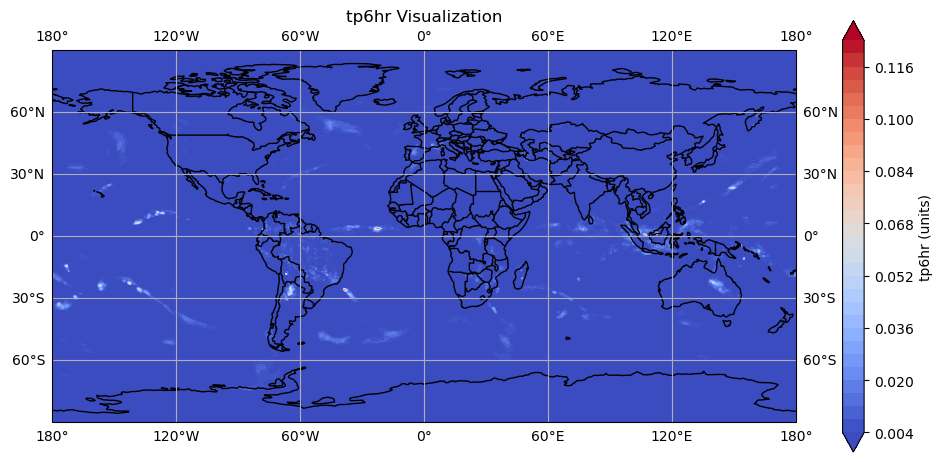

In [13]:
timestp = 0000
path = f"/media/volume/moein-storage-1/lucie/ERA5_highres/all_data/1999_{timestp:04d}.h5"

with h5py.File(path, 'r') as f:
    print(f.keys())
    print(f['2m_temperature'].shape)
    print(f['tp6hr'].shape)
    print(f['Latitude'].shape)
    print(f['Longitude'].shape)

# Plot the data

import h5py
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

# Open the .h5 file
file_path = f"/media/volume/moein-storage-1/lucie/ERA5_highres/all_data/1999_{timestp:04d}.h5"

with h5py.File(file_path, 'r') as f:
    var_name = 'tp6hr'  # Assuming this is the variable name you want to plot
    # Load the temperature or land-sea mask data
    temp_data = f[var_name][:]
    print(temp_data.shape)


# Ensure the data is flipped correctly based on latitude order
# if lats[0] > lats[-1]:  # If latitudes are reversed (from -90 to 90 instead of 90 to -90)
#     temp_data = np.flipud(temp_data
# Create a figure with a cartopy map projection
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# Add coastlines and other map features

ax.coastlines()

ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND, zorder=0, edgecolor='black')

# Handle possible discontinuity at the 180° longitude line by setting up boundaries
ax.set_global()

# Create a contour plot of the temperature or mask data

temp_plot = ax.contourf(hr_lons, hr_lats, temp_data, 40, transform=ccrs.PlateCarree(), cmap='coolwarm', extend='both')

# Add a colorbar
cbar = plt.colorbar(temp_plot, ax=ax, orientation='vertical', shrink=0.7)

cbar.set_label(f'{var_name} (units)')

# Add title
ax.set_title(f'{var_name} Visualization')

# Show the plot

plt.show()



In [70]:

# Get number of files in the directory
import os

dir_path = '/media/volume/moein-storage-1/lucie/ERA5_t30/'
num_files = len([f for f in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, f))])
print(num_files)

for timestep in range(0, num_files):
    data_path_lr = f"/media/volume/moein-storage-1/lucie/ERA5_t30/2010_{timestep:04d}.h5"
    with h5py.File(data_path_lr, 'r') as f:
        lr_Temperature_7 = f['input']['Temperature_7']
        lr_Specific_Humidity_7 = f['input']['Specific_Humidity_7']
        lr_U_wind_3 = f['input']['U-wind_3']
        lr_V_wind_3 = f['input']['V-wind_3']
        lr_logp = f['input']['logp']
        lr_tp6hr = f['input']['tp6hr']

    data_path_hr = f"/media/volume/moein-storage-1/lucie/ERA5_hr/2010_{timestep:04d}.h5"
    with h5py.File(data_path_hr, 'r') as f:
        print(f.keys())
        hr_2m_temperature = f['2m_temperature'].shape
        hr_tp6hr = f['tp6hr']
        hr_lat = f['Latitude'].shape
        hr_lon = f['Longitude'].shape


8760
<KeysViewHDF5 ['2m_temperature', 'Latitude', 'Longitude', 'tp6hr']>
<KeysViewHDF5 ['2m_temperature', 'Latitude', 'Longitude', 'tp6hr']>
<KeysViewHDF5 ['2m_temperature', 'Latitude', 'Longitude', 'tp6hr']>
<KeysViewHDF5 ['2m_temperature', 'Latitude', 'Longitude', 'tp6hr']>
<KeysViewHDF5 ['2m_temperature', 'Latitude', 'Longitude', 'tp6hr']>
<KeysViewHDF5 ['2m_temperature', 'Latitude', 'Longitude', 'tp6hr']>
<KeysViewHDF5 ['2m_temperature', 'Latitude', 'Longitude', 'tp6hr']>
<KeysViewHDF5 ['2m_temperature', 'Latitude', 'Longitude', 'tp6hr']>
<KeysViewHDF5 ['2m_temperature', 'Latitude', 'Longitude', 'tp6hr']>
<KeysViewHDF5 ['2m_temperature', 'Latitude', 'Longitude', 'tp6hr']>
<KeysViewHDF5 ['2m_temperature', 'Latitude', 'Longitude', 'tp6hr']>
<KeysViewHDF5 ['2m_temperature', 'Latitude', 'Longitude', 'tp6hr']>
<KeysViewHDF5 ['2m_temperature', 'Latitude', 'Longitude', 'tp6hr']>
<KeysViewHDF5 ['2m_temperature', 'Latitude', 'Longitude', 'tp6hr']>
<KeysViewHDF5 ['2m_temperature', 'Latitude'

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '/media/volume/moein-storage-1/lucie/ERA5_hr/2010_1460.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
# Code for counting the number of files for each year (bash)
for year in $(ls *.h5 | grep -o '^[0-9]\{4\}' | sort | uniq); do
  count=$(ls | grep "^${year}_" | wc -l)
  echo "$year: $count"
done

# Lowres data (# Years + time step for each year (6hr))
# Train
1981: 8760
1982: 8760
1983: 8760
1984: 8784
1985: 8760
1986: 8760
1987: 8760
1988: 8784
1989: 8760
1990: 8760
1991: 8760
1992: 8784
1993: 8760
1994: 8760
1995: 8760
1996: 8784
1997: 8760
1998: 8760
1999: 8760
2000: 8784
2001: 8760
2002: 8760
2003: 8760
2004: 8784
2005: 8760
2006: 8760
2007: 8760
2008: 8784
2009: 8760
# Validation
2010: 8760
# Test
2011: 8760
2012: 8784
2013: 8760



# Highres data (# Years + time step for each year (6hr))
1979: 1460
1980: 1464
1981: 1460
1982: 1460
1983: 1460
1984: 1464
1985: 1460
1986: 1460
1987: 1460
1988: 1464
1989: 1460
1990: 1460
1991: 1460
1992: 1464
1993: 1460
1994: 1460
1995: 1460
1996: 1464
1997: 1460
1998: 1460
1999: 1460
2000: 1464
2001: 1460
2002: 1460
2003: 1460
2004: 1464
2005: 1460
2006: 1460
2007: 1460
2008: 1464
2009: 1460
2010: 1460
2011: 1460
2012: 1464
2013: 1460
2014: 1460
2015: 1460
2016: 1464
2017: 1460
2018: 1460
2019: 1460
2020: 1464
2021: 1460

# Troy's code for testing the data 
#### (Need to be looked at in for checking 1. what are the zeros and masking 2. How to load the data  3. How to calculate the stats of the file)

In [ ]:

import h5py
import glob
import matplotlib.pyplot as plt
import numpy as np

files = glob.glob('/eagle/MDClimSim/troyarcomano/data/ERA5_SPEEDY_GRID/1_step_1hr_h5df_test/val/*.h5')
files = sorted(files)
files = files[0:-1:6]

tp = np.zeros((48,96))
tp_mean_std = np.zeros((len(files),48,96))
counter = 0
for file in files:
    with h5py.File(file,"r") as f:
        tp += f['input/tp6hr'][:]
        tp_mean_std[counter,:] = f['input/tp6hr'][:]
        if np.isnan(f['input/tp6hr'][:]).any():
            print(file,'has nan')
            print('tp',tp)
            tp[:] = 0 
            tp_mean_std[:] = 0
        counter += 1
    #print(tp)

tp = tp * 1000
tp = tp / 365.25

mean = np.mean(tp_mean_std)
std = np.std(tp_mean_std)
print(mean)
print(std)

normalized = (tp_mean_std - mean)/std
print(np.mean(normalized))
print(np.std(normalized))

plt.imshow(np.flipud(tp))
plt.colorbar()
plt.show()



In [69]:
import h5py
import glob
import os
import torch
from torch.utils.data import Dataset
import numpy as np

class ClimateDataset(Dataset):
    def __init__(self, input_dir_lr, input_dir_hr, input_vars, output_vars, lr_lats, lr_lons):
        """
        Args:
            input_dir_lr (str): Path to the directory containing low-resolution HDF5 files.
            input_dir_hr (str): Path to the directory containing high-resolution HDF5 files.
            input_vars (list): List of variable names to load from the input files.
            output_vars (list): List of variable names to load from the output files.
            lr_lats (list): List of low-resolution latitudes.
            lr_lons (list): List of low-resolution longitudes.
        """
        self.input_dir_lr = input_dir_lr
        self.input_dir_hr = input_dir_hr
        self.input_vars = input_vars
        self.output_vars = output_vars
        self.lr_lats = lr_lats
        self.lr_lons = lr_lons

        # Get all files in directories and sort them chronologically
        self.lr_files = sorted(glob.glob(os.path.join(self.input_dir_lr, "*.h5")))  # Hourly files
        self.hr_files = sorted(glob.glob(os.path.join(self.input_dir_hr, "*.h5")))  # 6-hourly files

        # Adjust LR files to every 6th file to align with HR files
        self.lr_files_six_hourly = self.lr_files[::6]
        assert len(self.hr_files) == len(self.lr_files_six_hourly), \
            "Mismatch between high-resolution and low-resolution timesteps."

    def __len__(self):
        return len(self.hr_files)

    def __getitem__(self, idx):
        # Load HR data for the current timestep
        hr_file_path = self.hr_files[idx]
        with h5py.File(hr_file_path, 'r') as f:
            hr_data = {var: f[var][:] for var in self.output_vars}
            hr_lats = f['Latitude'][:]
            hr_lons = f['Longitude'][:]

        # Load corresponding LR data (every 6th LR file matches each HR timestep)
        lr_file_path = self.lr_files_six_hourly[idx]
        with h5py.File(lr_file_path, 'r') as f:
            lr_data = {var: np.flipud(f['input'][var][:]) for var in self.input_vars}

        # Prepare the data to be returned as a dictionary
        data = {
            'input': torch.tensor([lr_data[var] for var in self.input_vars]),  # Input data tensor
            'output': torch.tensor([hr_data[var] for var in self.output_vars]),  # Output data tensor
            'input_vars': self.input_vars,  # List of input variable names
            'output_vars': self.output_vars,
            'lr_lats': self.lr_lats,  # Low-resolution latitudes
            'lr_lons': self.lr_lons,  # Low-resolution longitudes
            'hr_lats': hr_lats,  # High-resolution latitudes
            'hr_lons': hr_lons  # High-resolution longitudes
        }
        
        return data

# Example usage:
input_dir_lr = '/media/volume/moein-storage-1/lucie/ERA5_t30/'
input_dir_hr = '/media/volume/moein-storage-1/lucie/ERA5_hr/'
input_vars = ['Temperature_7', 'Specific_Humidity_7', 'U-wind_3', 'V-wind_3', 'logp', 'tp6hr']
output_vars = ['2m_temperature', 'tp6hr']

lr_lats = [87.159, 83.479, 79.777, 76.070, 72.362, 68.652, 64.942, 61.232, 
           57.521, 53.810, 50.099, 46.389, 42.678, 38.967, 35.256, 31.545, 
           27.833, 24.122, 20.411, 16.700, 12.989, 9.278, 5.567, 1.856, 
           -1.856, -5.567, -9.278, -12.989, -16.700, -20.411, -24.122, 
           -27.833, -31.545, -35.256, -38.967, -42.678, -46.389, -50.099, 
           -53.810, -57.521, -61.232, -64.942, -68.652, -72.362, -76.070, 
           -79.777, -83.479, -87.159]

lr_lons = [0.0, 3.75, 7.5, 11.25, 15.0, 18.75, 22.5, 26.25, 30.0, 33.75,
           37.5, 41.25, 45.0, 48.75, 52.5, 56.25, 60.0, 63.75, 67.5, 71.25,
           75.0, 78.75, 82.5, 86.25, 90.0, 93.75, 97.5, 101.25, 105.0, 108.75,
           112.5, 116.25, 120.0, 123.75, 127.5, 131.25, 135.0, 138.75, 142.5, 146.25,
           150.0, 153.75, 157.5, 161.25, 165.0, 168.75, 172.5, 176.25, 180.0, 183.75,
           187.5, 191.25, 195.0, 198.75, 202.5, 206.25, 210.0, 213.75, 217.5, 221.25,
           225.0, 228.75, 232.5, 236.25, 240.0, 243.75, 247.5, 251.25, 255.0, 258.75,
           262.5, 266.25, 270.0, 273.75, 277.5, 281.25, 285.0, 288.75, 292.5, 296.25,
           300.0, 303.75, 307.5, 311.25, 315.0, 318.75, 322.5, 326.25, 330.0, 333.75,
           337.5, 341.25, 345.0, 348.75, 352.5, 356.25]

# Create the dataset
dataset = ClimateDataset(input_dir_lr, input_dir_hr, input_vars, output_vars, lr_lats, lr_lons)

# Access a data sample
data_sample = dataset[500]
print(data_sample)

{'input': tensor([[[ 2.6531e+02,  2.6533e+02,  2.6534e+02,  ...,  2.6522e+02,
           2.6528e+02,  2.6531e+02],
         [ 2.6709e+02,  2.6764e+02,  2.6754e+02,  ...,  2.6487e+02,
           2.6552e+02,  2.6609e+02],
         [ 2.6915e+02,  2.6995e+02,  2.7074e+02,  ...,  2.6720e+02,
           2.6778e+02,  2.6847e+02],
         ...,
         [ 2.5258e+02,  2.5047e+02,  2.4844e+02,  ...,  2.5563e+02,
           2.5430e+02,  2.5387e+02],
         [ 2.4282e+02,  2.4320e+02,  2.4173e+02,  ...,  2.3952e+02,
           2.3912e+02,  2.4035e+02],
         [ 2.4201e+02,  2.4159e+02,  2.4193e+02,  ...,  2.4498e+02,
           2.4380e+02,  2.4281e+02]],

        [[ 2.0876e-03,  2.0544e-03,  2.0213e-03,  ...,  2.0422e-03,
           2.0636e-03,  2.0824e-03],
         [ 2.4259e-03,  2.4856e-03,  2.5342e-03,  ...,  1.8520e-03,
           1.9732e-03,  2.2553e-03],
         [ 2.6529e-03,  2.8175e-03,  3.0317e-03,  ...,  2.4564e-03,
           2.5241e-03,  2.6543e-03],
         ...,
         [ 6.69

In [3]:
data_sample.keys()
print(data_sample['input'].shape)
print(data_sample['output'].shape)
print(data_sample['input_vars'])
print(data_sample['output_vars'])
print(len(data_sample['lr_lats']))
print(len(data_sample['lr_lons']))
print(len(data_sample['hr_lats']))
print(len(data_sample['hr_lons']))


torch.Size([6, 48, 96])
torch.Size([2, 721, 1440])
['Temperature_7', 'Specific_Humidity_7', 'U-wind_3', 'V-wind_3', 'logp', 'tp6hr']
['2m_temperature', 'tp6hr']
48
96
721
1440


In [ ]:
from torch.utils.data import DataLoader
dataset = ClimateDataset(input_dir_lr, input_dir_hr, input_vars, output_vars, lr_lats, lr_lons)

# dataloader
from torch.utils.data import DataLoader

# Create DataLoader instance
dataloader = DataLoader(dataset, batch_size=8, shuffle=True)

# Iterate over the DataLoader
for batch_idx, data in enumerate(dataloader):
    print(f"Batch {batch_idx} data:")
    print
    # input_data = data['input']
    # output_data = data['output']
    # print("Input shape:", input_data.shape)
    # print("Output shape:", output_data.shape)
    # break  # Stop after one iteration


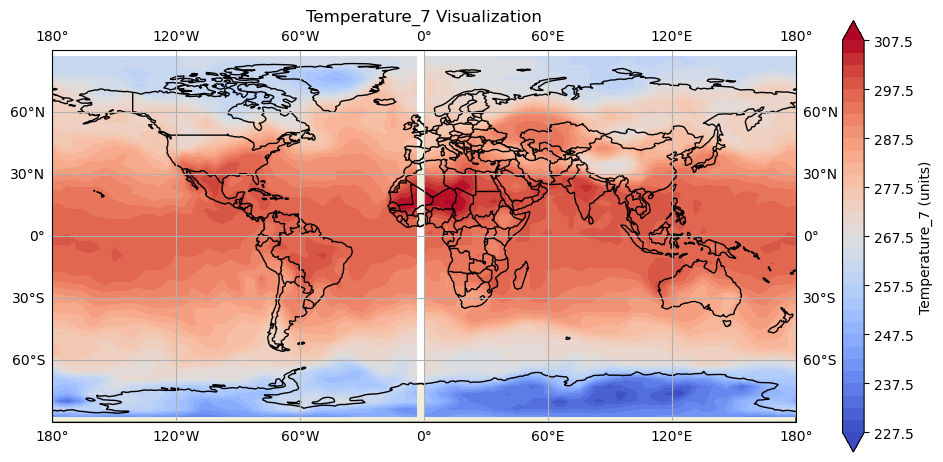

In [30]:
# Plot the data

import h5py
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
temp_data = data_sample['input'][0]  # Assuming the first output variable is temperature
var_name = 'Temperature_7'  # Assuming this is the variable name you want to plot
# Create a figure with a cartopy map projection
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# Add coastlines and other map features

ax.coastlines()

ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND, zorder=0, edgecolor='black')
# ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
# Handle possible discontinuity at the 180° longitude line by setting up boundaries
ax.set_global()

# Create a contour plot of the temperature or mask data

temp_plot = ax.contourf(lr_lons, lr_lats, temp_data, 40, transform=ccrs.PlateCarree(), cmap='coolwarm', extend='both')

# Add a colorbar
cbar = plt.colorbar(temp_plot, ax=ax, orientation='vertical', shrink=0.7)

cbar.set_label(f'{var_name} (units)')

# Add title
ax.set_title(f'{var_name} Visualization')

# Show the plot

plt.show()



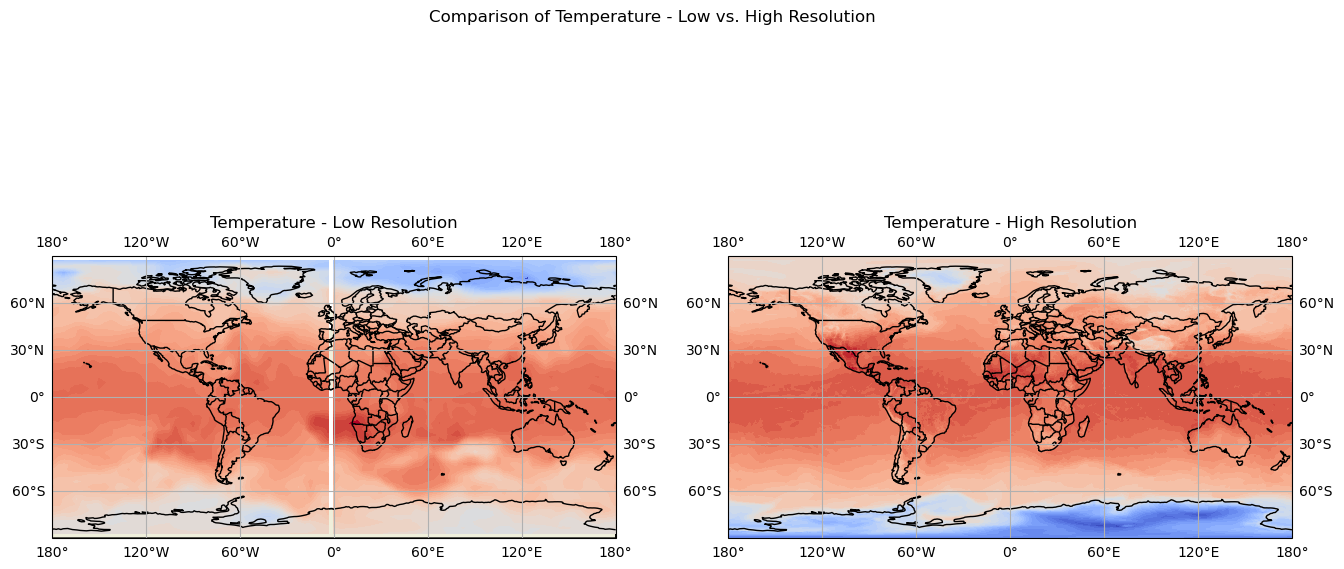

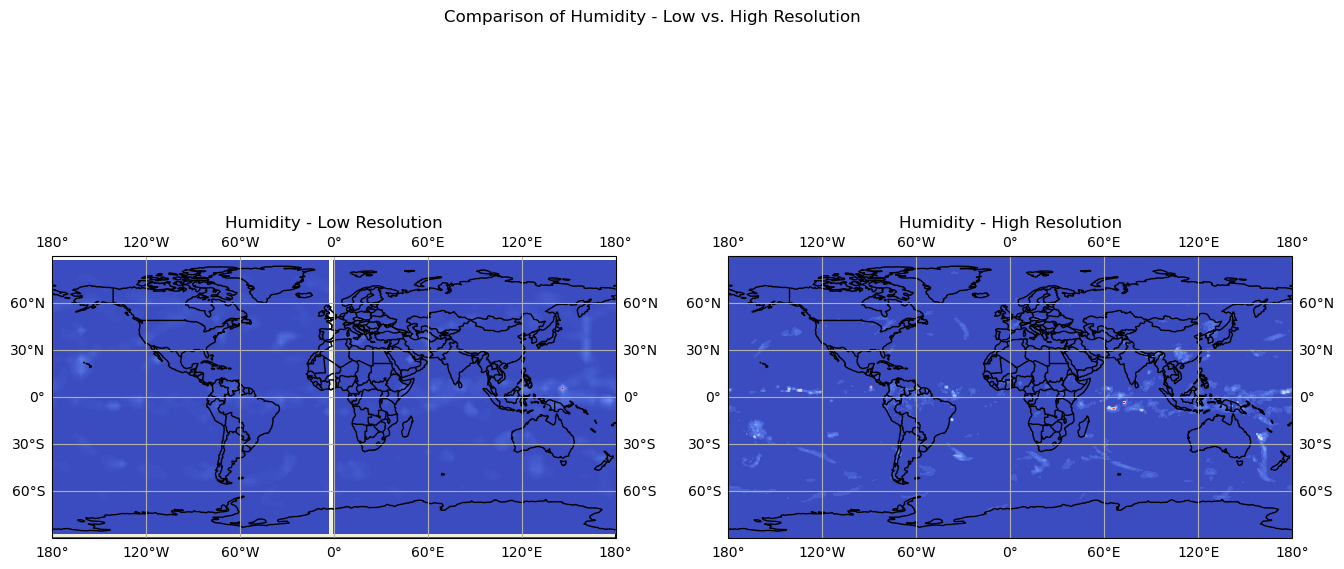

In [14]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

def plot_comparison(lr_data, hr_data, lr_lats, lr_lons, hr_lats, hr_lons, var_name):
    # Determine the min and max values for the color limits
    vmin = min(np.nanmin(lr_data), np.nanmin(hr_data))
    vmax = max(np.nanmax(lr_data), np.nanmax(hr_data))

    ticks = np.linspace(vmin, vmax, num=8)  # Adjust num as needed for more/less granularity
    
    # Create a figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), subplot_kw={'projection': ccrs.PlateCarree()})

    # Plot Low-Resolution (LR) Data
    ax1.set_global()
    ax1.coastlines()
    ax1.add_feature(cfeature.BORDERS)
    ax1.add_feature(cfeature.LAND, zorder=0, edgecolor='black')
    ax1.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
    lr_plot = ax1.contourf(lr_lons, lr_lats, lr_data, 40, transform=ccrs.PlateCarree(), cmap='coolwarm', extend='both', vmin=vmin, vmax=vmax)
    # cbar_lr = plt.colorbar(lr_plot, ax=ax1, orientation='vertical', shrink=0.5, ticks=ticks)
    # cbar_lr.set_label(f'{var_name} (units)')
    ax1.set_title(f'{var_name} - Low Resolution')

    # Plot High-Resolution (HR) Data
    ax2.set_global()
    ax2.coastlines()
    ax2.add_feature(cfeature.BORDERS)
    ax2.add_feature(cfeature.LAND, zorder=0, edgecolor='black')
    ax2.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
    hr_plot = ax2.contourf(hr_lons, hr_lats, hr_data, 40, transform=ccrs.PlateCarree(), cmap='coolwarm', extend='both', vmin=vmin, vmax=vmax)
    # cbar_hr = plt.colorbar(hr_plot, ax=ax2, orientation='vertical', shrink=0.5, ticks=ticks)
    # cbar_hr.set_label(f'{var_name} (units)')
    ax2.set_title(f'{var_name} - High Resolution')

    # Show the plot
    plt.suptitle(f'Comparison of {var_name} - Low vs. High Resolution')
    plt.show()

# Example usage
# Assuming lr_data, hr_data, lr_lats, lr_lons, hr_lats, hr_lons are available
plot_comparison(lr_data=data_sample['input'][0], hr_data=data_sample['output'][0],
                lr_lats=data_sample['lr_lats'], lr_lons=data_sample['lr_lons'], hr_lats=data_sample['hr_lats'], hr_lons=data_sample['hr_lons'],
                var_name='Temperature')
plot_comparison(lr_data=data_sample['input'][-1], hr_data=data_sample['output'][-1],
                lr_lats=data_sample['lr_lats'], lr_lons=data_sample['lr_lons'], hr_lats=data_sample['hr_lats'], hr_lons=data_sample['hr_lons'],
                var_name='Humidity')

In [ ]:
torch.Size([6, 48, 96])
torch.Size([2, 721, 1440])
['Temperature_7', 'Specific_Humidity_7', 'U-wind_3', 'V-wind_3', 'logp', 'tp6hr']
['2m_temperature', 'tp6hr']
48
96
721
1440

Dataset Mean: 0.0006185727156586912
Dataset STD:  0.0016798025900042993
Normalized Mean is:  1.9727997740902274e-16
Normalized STD is:  1.0000000000000004


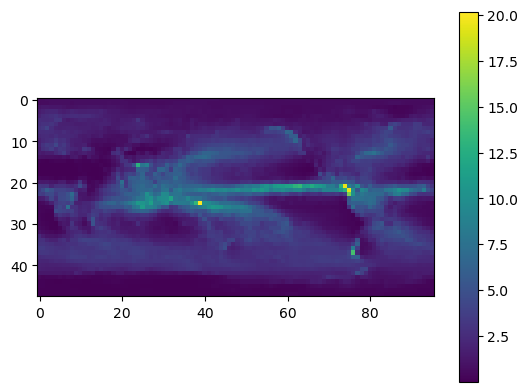

In [32]:
import h5py
import glob
import matplotlib.pyplot as plt
import numpy as np

files = glob.glob('/media/volume/moein-storage-1/lucie/ERA5_t30/*.h5')
files = sorted(files)
files = files[0:-1:6]

tp = np.zeros((48,96))

# Initialize counter and empty list to count valid files
valid_files = []

# First pass: Identify files without NaNs
for file in files:
    with h5py.File(file, "r") as f:
        current_data = f['input/tp6hr'][:]
        if not np.isnan(current_data).any():
            valid_files.append(file)

# Now, initialize tp_mean_std based on the count of valid files
tp_mean_std = np.zeros((len(valid_files), 48, 96))
counter = 0

# Second pass: Process only valid files
for file in valid_files:
    with h5py.File(file, "r") as f:
        current_data = f['input/tp6hr'][:]
        tp += current_data
        tp_mean_std[counter, :] = current_data
        counter += 1

tp = tp * 1000
tp = tp / 365.25

# Calculate mean and standard deviation based only on valid files
mean = np.mean(tp_mean_std)
std = np.std(tp_mean_std)

print("Dataset Mean:", mean)
print("Dataset STD: ", std)

normalized = (tp_mean_std - mean) / std
print("Normalized Mean is: ", np.mean(normalized))
print("Normalized STD is: ", np.std(normalized))

plt.imshow(np.flipud(tp))
plt.colorbar()
plt.show()

Get stats for LR ERA5 data

In [44]:
import h5py
import glob
import matplotlib.pyplot as plt
import numpy as np

# Define the variables to process
input_vars = ['Temperature_7', 'Specific_Humidity_7', 'U-wind_3', 'V-wind_3', 'logp', 'tp6hr']

# Collect files for years 2000 to 2010 with the specified format
files = []
for year in range(2000, 2011):
    files.extend(glob.glob(f'/media/volume/moein-storage-1/lucie/ERA5_t30/{year}_*.h5'))

# Sort the list of files
files = sorted(files)

# Select every 6th file (if desired)
files = files[0:-1:6]

print(files)  # Optional: print to verify the correct files are selected

# Initialize dictionary to store results for each variable
results = {}

# Loop over each variable
for var in input_vars:
    tp = np.zeros((48, 96))

    # Initialize valid files for this variable
    valid_files = []
    
    # First pass: Identify files without NaNs for the current variable
    for file in files:
        with h5py.File(file, "r") as f:
            if var in f['input']:
                current_data = f['input'][var][:]
                if not np.isnan(current_data).any():
                    valid_files.append(file)
            else:
                print(f"Variable '{var}' not found in file {file}, skipping this file.")
    
    # Initialize tp_mean_std based on the count of valid files
    tp_mean_std = np.zeros((len(valid_files), 48, 96))
    counter = 0
    
    # Second pass: Process only valid files for the current variable
    for file in valid_files:
        with h5py.File(file, "r") as f:
            current_data = f['input'][var][:]
            tp += current_data
            tp_mean_std[counter, :] = current_data
            counter += 1

    tp = tp * 1000
    tp = tp / 365.25

    # Calculate mean and standard deviation for the current variable
    mean = np.mean(tp_mean_std)
    std = np.std(tp_mean_std)
    
    # Normalize the data for the current variable
    normalized = (tp_mean_std - mean) / std
    normalized_mean = np.mean(normalized)
    normalized_std = np.std(normalized)
    
    # Store results in the dictionary
    results[var] = {
        "mean": mean,
        "std": std,
        "normalized_mean": normalized_mean,
        "normalized_std": normalized_std
    }
    
    # Print results for the current variable
    print(f"Variable: {var}")
    print("Dataset Mean:", mean)
    print("Dataset STD:", std)
    print("Normalized Mean:", normalized_mean)
    print("Normalized STD:", normalized_std)

# Save all results to a .npz file
np.savez('stats_2000_2010x.npz', **results)

# To verify, load and print the saved file
loaded_data = np.load('variable_stats.npz', allow_pickle=True)
for var_name in loaded_data:
    stats = loaded_data[var_name].item()
    print(f"{var_name}: Mean = {stats['mean']}, STD = {stats['std']}, "
          f"Normalized Mean = {stats['normalized_mean']}, Normalized STD = {stats['normalized_std']}")


['/media/volume/moein-storage-1/lucie/ERA5_t30/2010_0000.h5', '/media/volume/moein-storage-1/lucie/ERA5_t30/2010_0006.h5', '/media/volume/moein-storage-1/lucie/ERA5_t30/2010_0012.h5', '/media/volume/moein-storage-1/lucie/ERA5_t30/2010_0018.h5', '/media/volume/moein-storage-1/lucie/ERA5_t30/2010_0024.h5', '/media/volume/moein-storage-1/lucie/ERA5_t30/2010_0030.h5', '/media/volume/moein-storage-1/lucie/ERA5_t30/2010_0036.h5', '/media/volume/moein-storage-1/lucie/ERA5_t30/2010_0042.h5', '/media/volume/moein-storage-1/lucie/ERA5_t30/2010_0048.h5', '/media/volume/moein-storage-1/lucie/ERA5_t30/2010_0054.h5', '/media/volume/moein-storage-1/lucie/ERA5_t30/2010_0060.h5', '/media/volume/moein-storage-1/lucie/ERA5_t30/2010_0066.h5', '/media/volume/moein-storage-1/lucie/ERA5_t30/2010_0072.h5', '/media/volume/moein-storage-1/lucie/ERA5_t30/2010_0078.h5', '/media/volume/moein-storage-1/lucie/ERA5_t30/2010_0084.h5', '/media/volume/moein-storage-1/lucie/ERA5_t30/2010_0090.h5', '/media/volume/moein-st

Get stats for HR ERA5 data

In [67]:
import glob
import matplotlib.pyplot as plt
import numpy as np
from netCDF4 import Dataset  # Assuming .nc files are used for HR data
from tqdm import tqdm

# Define the input and output variables to process
input_vars = ['Temperature_7', 'Specific_Humidity_7', 'U-wind_3', 'V-wind_3', 'logp', 'tp6hr']
output_vars = ['tp6hr', '2m_temperature']

# Collect files for years 2000 to 2010 with the specified format
files = []
for year in range(2000, 2011):
    files.extend(glob.glob(f'/media/volume/moein-storage-1/lucie/ERA5_hr/{year}_*.h5'))

# Sort the list of files
files = sorted(files)

print(files)  # Optional: print to verify the correct files are selected

# Initialize dictionary to store results for each variable
results = {}

# Loop over each variable with tqdm for progress tracking
for var_name in tqdm(output_vars, desc="Processing Variables"):
    tp = np.zeros((721, 1440))

    # Initialize a list to collect data arrays for this variable
    tp_mean_std = []

    # Process each file for the current variable with tqdm for progress tracking
    for file in tqdm(files, desc=f"Processing files for {var_name}", leave=False):
        with Dataset(file, "r") as f:  # Use Dataset for .nc files
            if var_name in f.variables:
                data = f.variables[var_name][:]
                tp += data
                tp_mean_std.append(data)
            else:
                print(f"Variable '{var_name}' not found in file {file}, skipping this file.")

    tp = tp * 1000
    tp = tp / 365.25

    # Stack the data to calculate mean and standard deviation along the first axis
    tp_mean_std = np.stack(tp_mean_std)  # Convert list to a 3D array

    # Calculate mean and standard deviation for the current variable
    mean = np.mean(tp_mean_std)
    std = np.std(tp_mean_std)
    
    # Normalize the data for the current variable
    normalized = (tp_mean_std - mean) / std
    normalized_mean = np.mean(normalized)
    normalized_std = np.std(normalized)
    
    # Store results in the dictionary
    results[var_name] = {
        "mean": mean,
        "std": std,
        "normalized_mean": normalized_mean,
        "normalized_std": normalized_std
    }
    
    # Print results for the current variable
    print(f"Variable: {var_name}")
    print("Dataset Mean:", mean)
    print("Dataset STD:", std)
    print("Normalized Mean:", normalized_mean)
    print("Normalized STD:", normalized_std)

# Save all results to a .npz file
np.savez('stats_2000_2010_hr.npz', **results)

# To verify, load and print the saved file
loaded_data = np.load('stats_2000_2010_hr.npz', allow_pickle=True)
for var_name in loaded_data:
    stats = loaded_data[var_name].item()
    print(f"{var_name}: Mean = {stats['mean']}, STD = {stats['std']}, "
          f"Normalized Mean = {stats['normalized_mean']}, Normalized STD = {stats['normalized_std']}")

['/media/volume/moein-storage-1/lucie/ERA5_hr/2010_0000.h5', '/media/volume/moein-storage-1/lucie/ERA5_hr/2010_0001.h5', '/media/volume/moein-storage-1/lucie/ERA5_hr/2010_0002.h5', '/media/volume/moein-storage-1/lucie/ERA5_hr/2010_0003.h5', '/media/volume/moein-storage-1/lucie/ERA5_hr/2010_0004.h5', '/media/volume/moein-storage-1/lucie/ERA5_hr/2010_0005.h5', '/media/volume/moein-storage-1/lucie/ERA5_hr/2010_0006.h5', '/media/volume/moein-storage-1/lucie/ERA5_hr/2010_0007.h5', '/media/volume/moein-storage-1/lucie/ERA5_hr/2010_0008.h5', '/media/volume/moein-storage-1/lucie/ERA5_hr/2010_0009.h5', '/media/volume/moein-storage-1/lucie/ERA5_hr/2010_0010.h5', '/media/volume/moein-storage-1/lucie/ERA5_hr/2010_0011.h5', '/media/volume/moein-storage-1/lucie/ERA5_hr/2010_0012.h5', '/media/volume/moein-storage-1/lucie/ERA5_hr/2010_0013.h5', '/media/volume/moein-storage-1/lucie/ERA5_hr/2010_0014.h5', '/media/volume/moein-storage-1/lucie/ERA5_hr/2010_0015.h5', '/media/volume/moein-storage-1/lucie/ER

Processing Variables:   0%|          | 0/2 [00:00<?, ?it/s]

Processing Variables:  50%|█████     | 1/2 [00:24<00:24, 24.25s/it]

Variable: tp6hr
Dataset Mean: 0.00061148335
Dataset STD: 0.0021033806
Normalized Mean: 9.640549166978047e-07
Normalized STD: 1.00000061217974


Processing Variables: 100%|██████████| 2/2 [00:49<00:00, 24.72s/it]

Variable: 2m_temperature
Dataset Mean: 278.73157
Dataset STD: 21.381016
Normalized Mean: -0.0012813308467754705
Normalized STD: 0.9999994396036492
tp6hr: Mean = 0.0006114833522588015, STD = 0.002103380626067519, Normalized Mean = 9.640549166978047e-07, Normalized STD = 1.00000061217974
2m_temperature: Mean = 278.7315673828125, STD = 21.38101577758789, Normalized Mean = -0.0012813308467754705, Normalized STD = 0.9999994396036492


In [70]:
import glob
import os
import h5py
import torch
import numpy as np
from torch.utils.data import Dataset

class ClimateDataset(Dataset):
    def __init__(self, input_dir_lr, input_dir_hr, input_vars, output_vars, lr_lats, lr_lons,
                 normalize=False, input_normalization_file=None, output_normalization_file=None):
        """
        Args:
            input_dir_lr (str): Path to the directory containing low-resolution HDF5 files.
            input_dir_hr (str): Path to the directory containing high-resolution HDF5 files.
            input_vars (list): List of variable names to load from the input files.
            output_vars (list): List of variable names to load from the output files.
            lr_lats (list): List of low-resolution latitudes.
            lr_lons (list): List of low-resolution longitudes.
            normalize (bool): Whether to apply normalization.
            input_normalization_file (str): Path to input normalization file (if normalize=True).
            output_normalization_file (str): Path to output normalization file (if normalize=True).
        """
        self.input_dir_lr = input_dir_lr
        self.input_dir_hr = input_dir_hr
        self.input_vars = input_vars
        self.output_vars = output_vars
        self.lr_lats = lr_lats
        self.lr_lons = lr_lons
        self.normalize = normalize

        # Get all files in directories and sort them chronologically
        self.lr_files = sorted(glob.glob(os.path.join(self.input_dir_lr, "*.h5")))  # Hourly files
        self.hr_files = sorted(glob.glob(os.path.join(self.input_dir_hr, "*.h5")))  # 6-hourly files

        # Adjust LR files to every 6th file to align with HR files
        self.lr_files_six_hourly = self.lr_files[::6]
        assert len(self.hr_files) == len(self.lr_files_six_hourly), \
            "Mismatch between high-resolution and low-resolution timesteps."

        # Load normalization parameters if normalization is enabled
        if self.normalize:
            # Load input normalization parameters
            if input_normalization_file:
                input_norm_data = np.load(input_normalization_file, allow_pickle=True)
                self.input_mean_std = {var: (input_norm_data[var].item()['mean'], input_norm_data[var].item()['std']) 
                                       for var in self.input_vars}
            else:
                raise ValueError("Input normalization file path is required when normalization is enabled.")

            # Load output normalization parameters
            if output_normalization_file:
                output_norm_data = np.load(output_normalization_file, allow_pickle=True)
                self.output_mean_std = {var: (output_norm_data[var].item()['mean'], output_norm_data[var].item()['std']) 
                                        for var in self.output_vars}
            else:
                raise ValueError("Output normalization file path is required when normalization is enabled.")

    def __len__(self):
        return len(self.hr_files)

    def __getitem__(self, idx):
        # Load HR data for the current timestep
        hr_file_path = self.hr_files[idx]
        with h5py.File(hr_file_path, 'r') as f:
            hr_data = {var: f[var][:] for var in self.output_vars}
            hr_lats = f['Latitude'][:]
            hr_lons = f['Longitude'][:]

        # Normalize HR data if needed
        if self.normalize:
            hr_data = {var: (hr_data[var] - self.output_mean_std[var][0]) / self.output_mean_std[var][1]
                       for var in self.output_vars}

        # Load corresponding LR data (every 6th LR file matches each HR timestep)
        lr_file_path = self.lr_files_six_hourly[idx]
        with h5py.File(lr_file_path, 'r') as f:
            lr_data = {var: np.flipud(f['input'][var][:]) for var in self.input_vars}

        # Normalize LR data if needed
        if self.normalize:
            lr_data = {var: (lr_data[var] - self.input_mean_std[var][0]) / self.input_mean_std[var][1]
                       for var in self.input_vars}

        # Prepare the data to be returned as a dictionary
        data = {
            'input': torch.tensor([lr_data[var] for var in self.input_vars]),  # Input data tensor
            'output': torch.tensor([hr_data[var] for var in self.output_vars]),  # Output data tensor
            'input_vars': self.input_vars,  # List of input variable names
            'output_vars': self.output_vars,
            'lr_lats': self.lr_lats,  # Low-resolution latitudes
            'lr_lons': self.lr_lons,  # Low-resolution longitudes
            'hr_lats': hr_lats,  # High-resolution latitudes
            'hr_lons': hr_lons,  # High-resolution longitudes
        }

        # Include normalization statistics if normalization is enabled
        if self.normalize:
            data['input_stats'] = {var: {'mean': self.input_mean_std[var][0], 'std': self.input_mean_std[var][1]}
                                   for var in self.input_vars}
            data['output_stats'] = {var: {'mean': self.output_mean_std[var][0], 'std': self.output_mean_std[var][1]}
                                    for var in self.output_vars}

        return data
    
input_dir_lr = '/media/volume/moein-storage-1/lucie/ERA5_t30/'
input_dir_hr = '/media/volume/moein-storage-1/lucie/ERA5_hr/'
input_vars = ['Temperature_7', 'Specific_Humidity_7', 'U-wind_3', 'V-wind_3', 'logp', 'tp6hr']
output_vars = ['2m_temperature', 'tp6hr']
input_normalization_file = '/media/volume/moein-storage-1/lucie/stats_2000_2010_lr.npz'
output_normalization_file = '/media/volume/moein-storage-1/lucie/stats_2000_2010_hr.npz'

lr_lats = [87.159, 83.479, 79.777, 76.070, 72.362, 68.652, 64.942, 61.232, 
           57.521, 53.810, 50.099, 46.389, 42.678, 38.967, 35.256, 31.545, 
           27.833, 24.122, 20.411, 16.700, 12.989, 9.278, 5.567, 1.856, 
           -1.856, -5.567, -9.278, -12.989, -16.700, -20.411, -24.122, 
           -27.833, -31.545, -35.256, -38.967, -42.678, -46.389, -50.099, 
           -53.810, -57.521, -61.232, -64.942, -68.652, -72.362, -76.070, 
           -79.777, -83.479, -87.159]

lr_lons = [0.0, 3.75, 7.5, 11.25, 15.0, 18.75, 22.5, 26.25, 30.0, 33.75,
           37.5, 41.25, 45.0, 48.75, 52.5, 56.25, 60.0, 63.75, 67.5, 71.25,
           75.0, 78.75, 82.5, 86.25, 90.0, 93.75, 97.5, 101.25, 105.0, 108.75,
           112.5, 116.25, 120.0, 123.75, 127.5, 131.25, 135.0, 138.75, 142.5, 146.25,
           150.0, 153.75, 157.5, 161.25, 165.0, 168.75, 172.5, 176.25, 180.0, 183.75,
           187.5, 191.25, 195.0, 198.75, 202.5, 206.25, 210.0, 213.75, 217.5, 221.25,
           225.0, 228.75, 232.5, 236.25, 240.0, 243.75, 247.5, 251.25, 255.0, 258.75,
           262.5, 266.25, 270.0, 273.75, 277.5, 281.25, 285.0, 288.75, 292.5, 296.25,
           300.0, 303.75, 307.5, 311.25, 315.0, 318.75, 322.5, 326.25, 330.0, 333.75,
           337.5, 341.25, 345.0, 348.75, 352.5, 356.25]

# Create the dataset
dataset = ClimateDataset(input_dir_lr, input_dir_hr, input_vars, output_vars, lr_lats, lr_lons, normalize=True, input_normalization_file=input_normalization_file, output_normalization_file=output_normalization_file) 

# Access a data sample
data_sample = dataset[500]
print(data_sample)



{'input': tensor([[[-6.8897e-01, -6.8797e-01, -6.8742e-01,  ..., -6.9393e-01,
          -6.9091e-01, -6.8891e-01],
         [-5.8937e-01, -5.5891e-01, -5.6424e-01,  ..., -7.1365e-01,
          -6.7738e-01, -6.4536e-01],
         [-4.7464e-01, -4.2946e-01, -3.8543e-01,  ..., -5.8320e-01,
          -5.5122e-01, -5.1264e-01],
         ...,
         [-1.4006e+00, -1.5184e+00, -1.6322e+00,  ..., -1.2298e+00,
          -1.3042e+00, -1.3286e+00],
         [-1.9459e+00, -1.9246e+00, -2.0072e+00,  ..., -2.1306e+00,
          -2.1526e+00, -2.0844e+00],
         [-1.9914e+00, -2.0149e+00, -1.9958e+00,  ..., -1.8255e+00,
          -1.8914e+00, -1.9469e+00]],

        [[-8.2547e-01, -8.3143e-01, -8.3737e-01,  ..., -8.3361e-01,
          -8.2977e-01, -8.2642e-01],
         [-7.6481e-01, -7.5410e-01, -7.4540e-01,  ..., -8.6773e-01,
          -8.4599e-01, -7.9540e-01],
         [-7.2411e-01, -6.9460e-01, -6.5618e-01,  ..., -7.5935e-01,
          -7.4721e-01, -7.2386e-01],
         ...,
         [-1.07

In [90]:
import glob
import os
import h5py
import torch
import numpy as np
from torch.utils.data import Dataset

class ClimateDataset(Dataset):
    def __init__(self, input_dir_lr, input_dir_hr, input_vars, output_vars, lr_lats, lr_lons,
                 normalize=False, input_normalization_file=None, output_normalization_file=None):
        """
        Args:
            input_dir_lr (str): Path to the directory containing low-resolution HDF5 files.
            input_dir_hr (str): Path to the directory containing high-resolution HDF5 files.
            input_vars (list): List of variable names to load from the input files.
            output_vars (list): List of variable names to load from the output files.
            lr_lats (list): List of low-resolution latitudes.
            lr_lons (list): List of low-resolution longitudes.
            normalize (bool): Whether to apply normalization.
            input_normalization_file (str): Path to input normalization file (if normalize=True).
            output_normalization_file (str): Path to output normalization file (if normalize=True).
        """
        self.input_dir_lr = input_dir_lr
        self.input_dir_hr = input_dir_hr
        self.input_vars = input_vars
        self.output_vars = output_vars
        self.lr_lats = lr_lats
        self.lr_lons = lr_lons
        self.normalize = normalize

        # Get all files in directories and sort them chronologically
        lr_files = sorted(glob.glob(os.path.join(self.input_dir_lr, "*.h5")))  # Hourly files
        hr_files = sorted(glob.glob(os.path.join(self.input_dir_hr, "*.h5")))  # 6-hourly files

        # Adjust LR files to every 6th file to align with HR files
        lr_files_six_hourly = lr_files[::6]

        # Filter out files that contain NaNs
        self.lr_files_six_hourly, self.hr_files = [], []
        for lr_file, hr_file in zip(lr_files_six_hourly, hr_files):
            if not self._file_has_nan(lr_file, self.input_vars, 'input') and \
               not self._file_has_nan(hr_file, self.output_vars, ''):
                self.lr_files_six_hourly.append(lr_file)
                self.hr_files.append(hr_file)

        # Check if there is a mismatch in filtered files
        assert len(self.hr_files) == len(self.lr_files_six_hourly), \
            "Mismatch between high-resolution and low-resolution timesteps after filtering for NaNs."

        # Load normalization parameters if normalization is enabled
        if self.normalize:
            # Load input normalization parameters
            if input_normalization_file:
                input_norm_data = np.load(input_normalization_file, allow_pickle=True)
                self.input_mean_std = {var: (input_norm_data[var].item()['mean'], input_norm_data[var].item()['std']) 
                                       for var in self.input_vars}
            else:
                raise ValueError("Input normalization file path is required when normalization is enabled.")

            # Load output normalization parameters
            if output_normalization_file:
                output_norm_data = np.load(output_normalization_file, allow_pickle=True)
                self.output_mean_std = {var: (output_norm_data[var].item()['mean'], output_norm_data[var].item()['std']) 
                                        for var in self.output_vars}
            else:
                raise ValueError("Output normalization file path is required when normalization is enabled.")

    def _file_has_nan(self, file_path, vars_list, group):
        """Helper function to check if a file has NaNs for specified variables."""
        with h5py.File(file_path, 'r') as f:
            for var in vars_list:
                data_path = f'{group}/{var}' if group else var
                if data_path in f and np.isnan(f[data_path][:]).any():
                    print(f"Skipping file {file_path} due to NaNs in {var}")
                    return True
        return False

    def __len__(self):
        return len(self.hr_files)

    def __getitem__(self, idx):
        # Load HR data for the current timestep
        hr_file_path = self.hr_files[idx]
        with h5py.File(hr_file_path, 'r') as f:
            hr_data = {var: f[var][:] for var in self.output_vars}
            hr_lats = f['Latitude'][:]
            hr_lons = f['Longitude'][:]

        # Normalize HR data if needed
        if self.normalize:
            hr_data = {var: (hr_data[var] - self.output_mean_std[var][0]) / self.output_mean_std[var][1]
                       for var in self.output_vars}

        # Load corresponding LR data (every 6th LR file matches each HR timestep)
        lr_file_path = self.lr_files_six_hourly[idx]
        with h5py.File(lr_file_path, 'r') as f:
            lr_data = {var: np.flipud(f['input'][var][:]) for var in self.input_vars}

        # Normalize LR data if needed
        if self.normalize:
            lr_data = {var: (lr_data[var] - self.input_mean_std[var][0]) / self.input_mean_std[var][1]
                       for var in self.input_vars}

        # Prepare the data to be returned as a dictionary
        data = {
            'input': torch.tensor([lr_data[var] for var in self.input_vars]),  # Input data tensor
            'output': torch.tensor([hr_data[var] for var in self.output_vars]),  # Output data tensor
            'input_vars': self.input_vars,  # List of input variable names
            'output_vars': self.output_vars,
            'lr_lats': self.lr_lats,  # Low-resolution latitudes
            'lr_lons': self.lr_lons,  # Low-resolution longitudes
            'hr_lats': hr_lats,  # High-resolution latitudes
            'hr_lons': hr_lons  # High-resolution longitudes
        }

        # Include normalization statistics if normalization is enabled
        if self.normalize:
            data['input_stats'] = {var: {'mean': self.input_mean_std[var][0], 'std': self.input_mean_std[var][1]}
                                   for var in self.input_vars}
            data['output_stats'] = {var: {'mean': self.output_mean_std[var][0], 'std': self.output_mean_std[var][1]}
                                    for var in self.output_vars}

        return data

input_dir_lr = '/media/volume/moein-storage-1/lucie/ERA5_t30/'
input_dir_hr = '/media/volume/moein-storage-1/lucie/ERA5_hr/'
input_vars = ['Temperature_7', 'Specific_Humidity_7', 'U-wind_3', 'V-wind_3', 'logp', 'tp6hr']
output_vars = ['2m_temperature', 'tp6hr']
input_normalization_file = '/media/volume/moein-storage-1/lucie/stats_2000_2010_lr.npz'
output_normalization_file = '/media/volume/moein-storage-1/lucie/stats_2000_2010_hr.npz'

lr_lats = [87.159, 83.479, 79.777, 76.070, 72.362, 68.652, 64.942, 61.232, 
           57.521, 53.810, 50.099, 46.389, 42.678, 38.967, 35.256, 31.545, 
           27.833, 24.122, 20.411, 16.700, 12.989, 9.278, 5.567, 1.856, 
           -1.856, -5.567, -9.278, -12.989, -16.700, -20.411, -24.122, 
           -27.833, -31.545, -35.256, -38.967, -42.678, -46.389, -50.099, 
           -53.810, -57.521, -61.232, -64.942, -68.652, -72.362, -76.070, 
           -79.777, -83.479, -87.159]

lr_lons = [0.0, 3.75, 7.5, 11.25, 15.0, 18.75, 22.5, 26.25, 30.0, 33.75,
           37.5, 41.25, 45.0, 48.75, 52.5, 56.25, 60.0, 63.75, 67.5, 71.25,
           75.0, 78.75, 82.5, 86.25, 90.0, 93.75, 97.5, 101.25, 105.0, 108.75,
           112.5, 116.25, 120.0, 123.75, 127.5, 131.25, 135.0, 138.75, 142.5, 146.25,
           150.0, 153.75, 157.5, 161.25, 165.0, 168.75, 172.5, 176.25, 180.0, 183.75,
           187.5, 191.25, 195.0, 198.75, 202.5, 206.25, 210.0, 213.75, 217.5, 221.25,
           225.0, 228.75, 232.5, 236.25, 240.0, 243.75, 247.5, 251.25, 255.0, 258.75,
           262.5, 266.25, 270.0, 273.75, 277.5, 281.25, 285.0, 288.75, 292.5, 296.25,
           300.0, 303.75, 307.5, 311.25, 315.0, 318.75, 322.5, 326.25, 330.0, 333.75,
           337.5, 341.25, 345.0, 348.75, 352.5, 356.25]

# Create the dataset
dataset = ClimateDataset(input_dir_lr, input_dir_hr, input_vars, output_vars, lr_lats, lr_lons, normalize=True, input_normalization_file=input_normalization_file, output_normalization_file=output_normalization_file) 

# Access a data sample
data_sample = dataset[500]
print(data_sample)
        

Skipping file /media/volume/moein-storage-1/lucie/ERA5_t30/2010_0000.h5 due to NaNs in tp6hr
{'input': tensor([[[-0.6963, -0.6934, -0.6932,  ..., -0.7050, -0.7009, -0.6969],
         [-0.6978, -0.5761, -0.5296,  ..., -0.7320, -0.6968, -0.7173],
         [-0.3984, -0.3555, -0.3374,  ..., -0.6149, -0.5039, -0.4569],
         ...,
         [-1.4779, -1.5296, -1.6388,  ..., -1.2453, -1.3563, -1.4083],
         [-1.9641, -1.9708, -2.0710,  ..., -2.1892, -2.1981, -2.1010],
         [-1.9697, -2.0192, -2.0282,  ..., -1.8168, -1.8639, -1.9151]],

        [[-0.8537, -0.8572, -0.8540,  ..., -0.8369, -0.8435, -0.8531],
         [-0.8272, -0.7883, -0.7538,  ..., -0.8521, -0.8345, -0.8511],
         [-0.6518, -0.6361, -0.6855,  ..., -0.7829, -0.7141, -0.6951],
         ...,
         [-1.0503, -1.0978, -1.1388,  ..., -1.0290, -1.0360, -1.0411],
         [-1.1688, -1.1708, -1.1781,  ..., -1.1579, -1.1611, -1.1642],
         [-1.1869, -1.1863, -1.1856,  ..., -1.1856, -1.1865, -1.1870]],

        [[ 0.

In [95]:
data_sample.keys()
print(data_sample['input'].shape)
print(data_sample['output'].shape)
print(data_sample['input'].mean(axis=(1, 2)))
print(data_sample['input'].std(axis=(1, 2)))
print(data_sample['output'].mean(axis=(1, 2)))
print(data_sample['output'].std(axis=(1, 2)))

torch.Size([6, 48, 96])
torch.Size([2, 721, 1440])
tensor([ 0.0353,  0.0141, -0.0361,  0.0100,  0.0226, -0.0127])
tensor([0.9466, 1.0399, 0.9883, 0.9515, 0.9598, 0.9746])
tensor([ 0.0365, -0.0104])
tensor([0.9719, 0.9482])


In [100]:
data_sample['input_vars']
data_sample['output_vars']

['2m_temperature', 'tp6hr']